# 타이타닉 생존예측-Tree

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [13]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [14]:
df.Name.nunique()

887

In [15]:
df = df.set_index('Name')
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [16]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']

In [24]:
df.Survived.mean()   # 38% 생존

0.3855693348365276

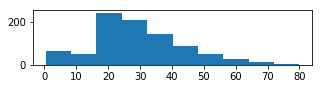

In [26]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Age'].values)

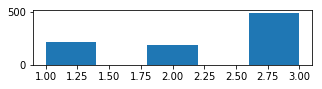

In [29]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Pclass'].values, bins=5)

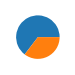

In [31]:
s = df['Sex']
s_c = s.value_counts()

plt.figure(figsize=(5,1))
p = plt.pie(s_c)

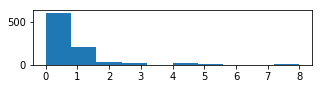

In [33]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values)

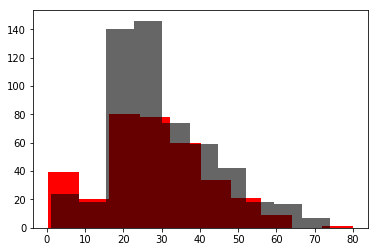

In [43]:
p = plt.hist(df[df['Survived']==1]['Age'].values, color='red')
p = plt.hist(df[df['Survived']==0]['Age'].values, color='black', alpha=0.6)

In [44]:
df.head(1)

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.25


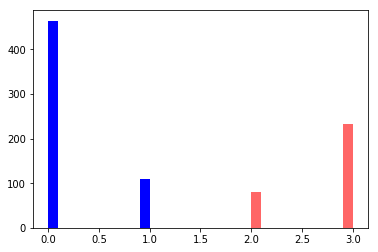

In [48]:
p = plt.hist(df[df['Sex']=='male']['Survived'].values, color='blue')
p = plt.hist(df[df['Sex']=='female']['Survived'].values+2, color='red', alpha=0.6)

In [49]:
df.dtypes  # Pclass 는 범주이므로 문자형식으로 변경필요

Survived      int64
Pclass        int64
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [51]:
# 1,2,3 등석은 범주형입니다.
df['Pclass'] = df['Pclass'].astype('object')

In [52]:
df.dtypes 

Survived      int64
Pclass       object
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [53]:
data = pd.get_dummies(df)

In [54]:
data.head()

,Survived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,0,35.0,0,0,8.0500,0,0,1,0,1


In [55]:
X = data.drop(columns='Survived')
y = data['Survived']

In [60]:
X.head()

,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,
Mr. Owen Harris Braund,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,35.0,0,0,8.0500,0,0,1,0,1


In [61]:
y.head()

Name
Mr. Owen Harris Braund                                0
Mrs. John Bradley (Florence Briggs Thayer) Cumings    1
Miss. Laina Heikkinen                                 1
Mrs. Jacques Heath (Lily May Peel) Futrelle           1
Mr. William Henry Allen                               0
Name: Survived, dtype: int64

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X,y)

In [64]:
model.score(X,y)

0.8489289740698985

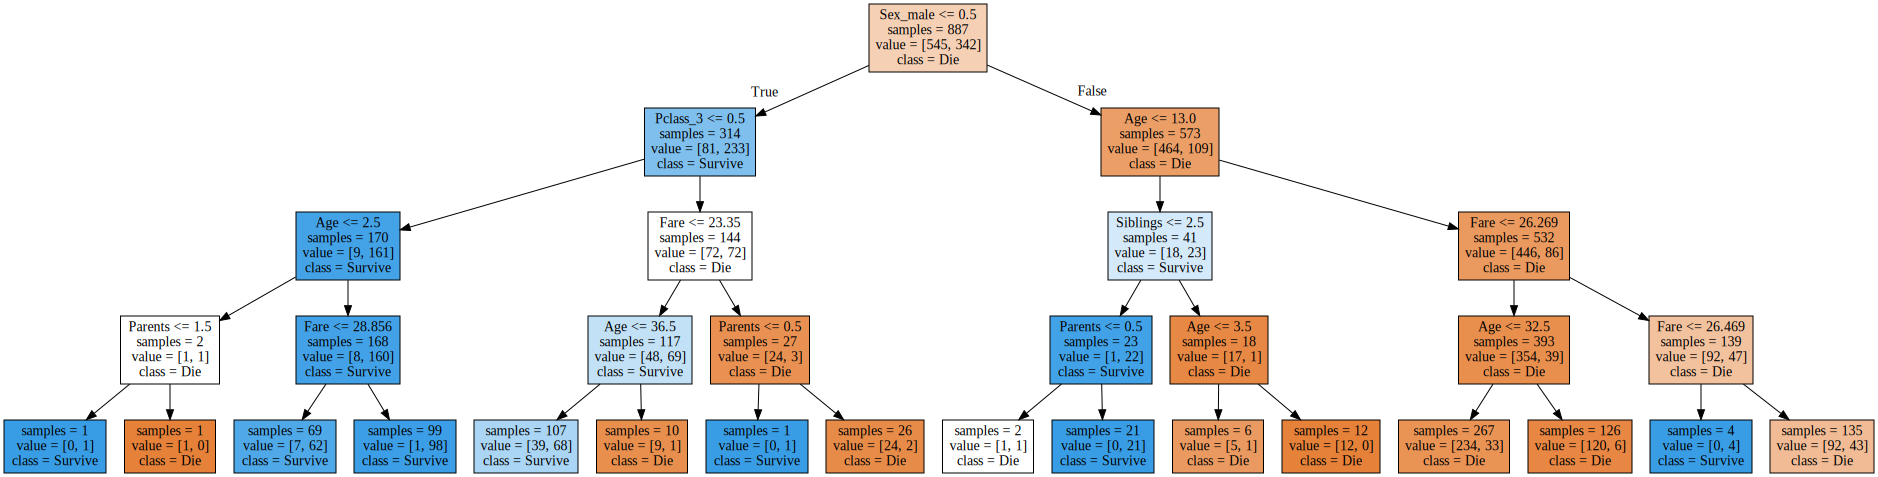

In [67]:
export_graphviz(model, out_file ='titanic.dot', class_names=['Die','Survive'], feature_names=X.columns, impurity=False, filled=True)
with open('titanic.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))    